Julia Kang - jkang613@gmail.com - AMLI 2019 - Mills College

In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from math import sqrt #for RMSE


## Model: Simple Random Forest Classifier 

In [2]:
# raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = pd.read_csv('choice_features.csv')
raw_df = raw_df.drop('Unnamed: 0', axis = 1) 

raw_df.head() #ad id is unique to each row
# len(sub_df)

,click,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_id,device_ip,device_model,...,C15,C16,date,time,user_id,device_ip_count,device_id_count,user_count,user_hour_count,user_bagged
0,0,1005,0,227,3,12,0,438,1599,138,...,320,50,0,0,1681,2,2,2,95,232
1,0,1005,1,7,12,12,0,438,611,393,...,320,50,0,0,638,30,30,30,95,232
2,0,1005,0,225,4,15,2,438,1212,505,...,320,50,0,0,1264,1499,1499,1499,95,255
3,0,1005,0,125,3,12,0,438,1034,373,...,300,250,0,0,1081,97,97,97,95,232
4,0,1005,0,227,3,12,0,438,3474,746,...,320,50,0,0,3663,2,2,2,95,232


In [3]:
FEATURES = []

for col in raw_df.columns:
    if np.issubdtype(raw_df[col].dtypes , np.number):
        FEATURES.append(col)

FEATURES.remove('click')
TARGET = 'click'

In [4]:
FEATURES

['C1',
 'banner_pos',
 'site_domain',
 'site_category',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'date',
 'time',
 'user_id',
 'device_ip_count',
 'device_id_count',
 'user_count',
 'user_hour_count',
 'user_bagged']

In [5]:
# split the data into test and train
train, test  = train_test_split(
  raw_df,                        # split our digits dataframe
  stratify=raw_df[TARGET],       # stratify by the 'click' column   
  test_size=0.2,                # 20% of the data should be held for testing
  random_state=42               # hard-coded random state for repeatability in the example
)

train.head()

,click,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_id,device_ip,device_model,...,C15,C16,date,time,user_id,device_ip_count,device_id_count,user_count,user_hour_count,user_bagged
4114,0,1005,0,225,4,3,12,438,931,406,...,320,50,9,18,963,1499,1499,1499,170,148
1250,0,1002,0,274,4,12,0,266,2147,564,...,320,50,2,14,1724,1,1,1,211,232
3862,0,1005,1,83,12,12,0,438,1613,123,...,320,50,9,7,1694,24,24,24,174,232
2094,1,1005,0,275,1,12,0,438,451,864,...,320,50,5,2,479,720,720,720,136,232
670,1,1005,0,225,4,7,2,543,922,67,...,320,50,1,10,3449,1499,1499,1499,232,248


In [9]:
#take preprocessed data from above for train and test set
train_features = np.array(train[FEATURES])
train_labels = np.array(train[TARGET])
test_features = np.array(test[FEATURES])
test_labels = np.array(test[TARGET])

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3347, 21)
Training Labels Shape: (3347,)
Testing Features Shape: (837, 21)
Testing Labels Shape: (837,)


In [10]:
# Instantiate model with 10 decision trees - this will be our baseline model
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels.ravel()) #use ravel() - it flattens the array

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#reshape predictions to have 1 column to later use to concatenate
predictions = predictions.reshape(837,1)

In [13]:
#create dataframe that compares the actual vs predicted
results = pd.DataFrame(np.column_stack((test_labels, predictions)))

# results

In [14]:
RMSE = sqrt(metrics.mean_squared_error(test_labels, predictions))
print("RMSE when n_estimators = 10 is {}".format(RMSE))
# #RMSE: 0.4315343595981214 with n_estimators = 10

LL = sqrt(metrics.log_loss(test_labels, predictions))
print("Log Loss when n_estimators = 10 is {}".format(LL))

RMSE when n_estimators = 10 is 0.4372172238559687
Log Loss when n_estimators = 10 is 2.569517155949924


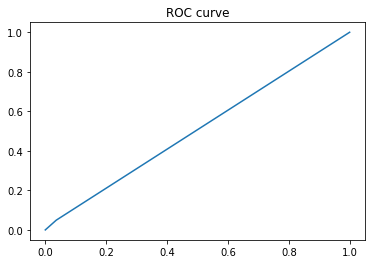

AUC when n_estimators = 10 is 0.5066622758131523


In [15]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.show()

print("AUC when n_estimators = 10 is {}".format(roc_auc))

### Random Forest - Parameter Tuning

In [16]:
#running scikit learns recursive feature selection
n = 15 #number of features we want to select
rfe = RFE(rf, n_features_to_select=n, step=1, verbose=0)

rfe = rfe.fit(train_features, train_labels)

print(rfe.support_)
print(rfe.ranking_)


[False False  True False  True  True  True  True  True False False False
  True  True  True  True  True  True  True  True  True]
[5 4 1 2 1 1 1 1 1 7 3 6 1 1 1 1 1 1 1 1 1]


In [17]:
rfe_bool = rfe.support_
rfe_rank = rfe.ranking_

### Re-Run Model with RFE features

In [18]:
FEATURES = np.array(FEATURES)
FEATURES_rfe = FEATURES[rfe_bool]

In [19]:
#take preprocessed data from above for train and test set
train_features = np.array(train[FEATURES_rfe])
train_labels = np.array(train[TARGET])
test_features = np.array(test[FEATURES_rfe])
test_labels = np.array(test[TARGET])

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3347, 15)
Training Labels Shape: (3347,)
Testing Features Shape: (837, 15)
Testing Labels Shape: (837,)


In [20]:
# Instantiate model with 10 decision trees - this will be our baseline model
rf_rfe = RandomForestClassifier(n_estimators = 500, random_state = 42)
# Train the model on training data
rf_rfe.fit(train_features, train_labels.ravel()) #use ravel() - it flattens the array

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
# Use the forest's predict method on the test data
predictions = rf_rfe.predict(test_features)
#reshape predictions to have 1 column to later use to concatenate
predictions = predictions.reshape(80882,1)

RMSE = sqrt(metrics.mean_squared_error(test_labels, predictions))
print("[With RFE Features] RMSE when n_estimators = 10 is {}".format(RMSE))
# #RMSE: 0.4315343595981214 with n_estimators = 10

LL = sqrt(metrics.log_loss(test_labels, predictions))
print("[With RFE Features] Log Loss when n_estimators = 10 is {}".format(LL))


#  10 Trees
# [With RFE Features] RMSE when n_estimators = 10 is 0.42384480681796866
# [With RFE Features] Log Loss when n_estimators = 10 is 2.490928116292876

ValueError: cannot reshape array of size 837 into shape (80882,1)

**Summary:** Slightly better with RFE. (2.493498533810002 vs 2.490928116292876)

In [25]:
#try different n_estimators to see if we can find an optimal number of trees
n_estimators = [1, 10, 64, 225, 500]

ll_results = []
auc_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, random_state = 42)
    rf.fit(train_features, train_labels.ravel())
    predictions = (rf.predict(test_features)).reshape(837,1)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
    
    #metrics
    roc_auc = metrics.auc(fpr, tpr)
    auc_results.append(roc_auc)
    LL = sqrt(metrics.log_loss(test_labels, predictions))
    ll_results.append(RMSE)
    
    print(("Model where n_estimator = {} completed").format(estimator))
    
    
ll_results
# auc_results

Model where n_estimator = 1 completed
Model where n_estimator = 10 completed
Model where n_estimator = 64 completed
Model where n_estimator = 225 completed
Model where n_estimator = 500 completed


[0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687]

In [26]:
ll_results

[0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687,
 0.4372172238559687]